# Part 1

The time to the bottom of the 4km shaft using the algebraic expression, assuming no drag, is 28.55686245854129 seconds.
According to the differential equation form, assuming no drag, the time to reach the bottom of the shaft is 28.5568624585413 seconds.

The time it will take for the object to reach the bottom of the shaft, assuming no drag, is essentially indentical using the numerical
versus the analytic solutions. They are the same through the first 12 decimal places, at which point they differ by 1 in the 14th decimal place.
This discrepancy is likely caused by floating point errors, and not something to worry about.



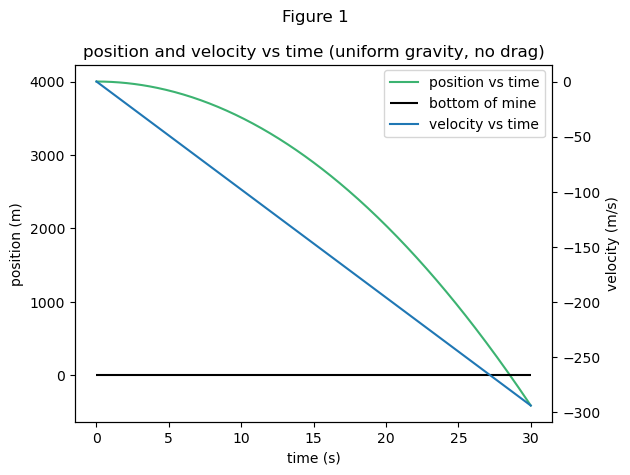

In [1]:
#Lab 2, Part 1

#importing relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#Question 1
#Freefall no drag calculation

def No_Drag(Dist, Grav_accel):
    #x = 0.5a*t^2 +v1*t, v1 = 0
    return np.sqrt(Dist/(0.5*Grav_accel))

print('The time to the bottom of the 4km shaft using the algebraic expression, assuming no drag, is', No_Drag(4000, 9.81), 'seconds.')

#Question 2
#Equations written below

#Eqn 1: v = dy/dt
#Eqn 2: dv/dt = -g - (alpha) * v^(gamma)


#Question 3: numerically solving with alpha = 0.
def Derivatives(t, s):
    y = s[0]
    v = s[1]
    dydt = v
    dvdt = -g + alpha*v**gamma
    return [dydt, dvdt]

#setting constants
alpha = 0
gamma = 0 #This doesnt really matter here since alpha = 0
g = 9.81

#Defining initial conditions
y_0 = 4000
v_0 = 0
init_conditions = [4000, 0]

#setting t-eval range
t0, tf, = 0, 30
t_eval = np.linspace(t0, tf, 401)

#creating a function to use for events for when y = 0
def bottom_of_mine(t,s):
    return s[0]
    

#using solve_ivp to solve the differential equation
soln = solve_ivp(fun = Derivatives, y0 = init_conditions, t_span = (t0, tf), t_eval = t_eval, events = bottom_of_mine)

#capturing the t, y, and v arrays
t = soln.t
y = soln.y[0]
v = soln.y[1]

#capturing the time where the object hits the bottom and printing and comparing the values
reached_bottom_t = soln.t_events[0][0]
print('According to the differential equation form, assuming no drag, the time to reach the bottom of the shaft is',reached_bottom_t,'seconds.\n')

#comparing the analytic and numerical solutions
print('''The time it will take for the object to reach the bottom of the shaft, assuming no drag, is essentially indentical using the numerical
versus the analytic solutions. They are the same through the first 12 decimal places, at which point they differ by 1 in the 14th decimal place.
This discrepancy is likely caused by floating point errors, and not something to worry about.\n''')

#plotting
fig, ax = plt.subplots()
ax.plot(t,y,c='mediumseagreen',label='position vs time')
ax.set_xlabel('time (s)')
ax.set_ylabel('position (m)')
ax.set_title('position and velocity vs time (uniform gravity, no drag)')
ax.hlines(0.0,0,30,color='black',label='bottom of mine')

ax2 = ax.twinx()
ax2.plot(t,v,label='velocity vs time')
ax2.set_ylabel('velocity (m/s)')

fig.legend(loc = (0.61,0.71))
fig.suptitle('Figure 1')
fig.tight_layout()

# Part 2

incorporating a height-dependent g had essentially no effect on the fall time. This is because the distance to the bottom
of the mine is essentially nothing compared to the radius of the earth, so for this distance, the value for g is still very very close to 9.81, so
the motion of the object is essentially the same. it took 28.55835511190965 seconds for the object to reach the bottom of the mine under
a changing gravitational acceleration, while it took 28.55686245854129 seconds for it to reach the bottom under an assumption of a constant
gravitational acceleration, so there is a difference of around 0.0015, which is a difference, but not a significant one.

we can calibrate a value for alpha by testing different values for alpha and trying to get one which gives a terminal velocity as close to
      50m/s as possible.

The time it takes for the object to reach the bottom, when accounting for drag, has a very significant effect on fall time. Instead
of taking 28.55835511190965 seconds

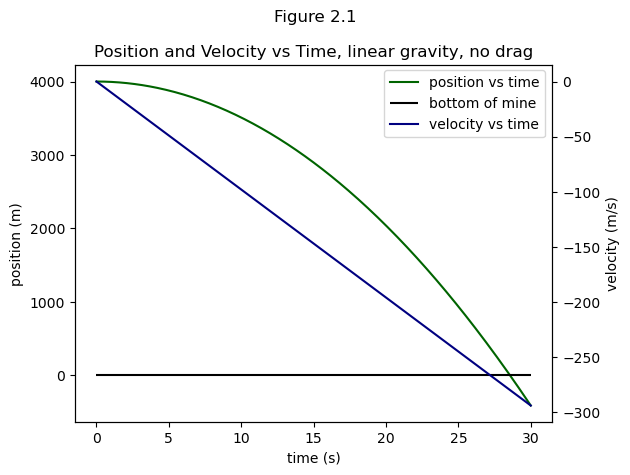

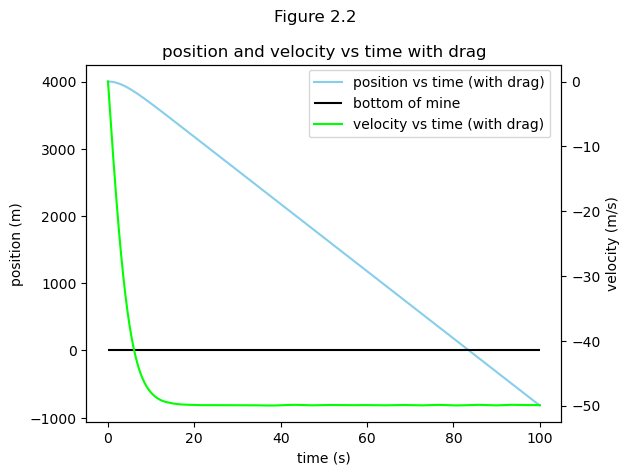

In [2]:
#lab 2, Part 2

#defining constants
g0 = 9.81
R_e = 6.3781 * 10 ** 6

#defining our function with a g that depends on time

def Derivatives_g_dependent(t, s):
    y = s[0]
    v = s[1]
    g_dependent = g0 * (R_e+(y-4000)) / R_e
    dydt = v
    dvdt = -g_dependent + alpha*v**gamma
    return [dydt, dvdt]

#defining constants
alpha = 0
gamma = 0 #This doesnt really matter here since alpha = 0

#events function
def bottom_of_mine(t,s):
    return s[0]

#defining initial conditions
y_0 = 4000
v_0 = 0
init_conditions = [4000, 0]

#setting t-eval range
t0, tf, = 0, 30
t_eval = np.linspace(t0, tf, 401)
#using solve_ivp. Taking t values and initial conditions from the previous cell

soln = solve_ivp(fun = Derivatives_g_dependent, y0 = init_conditions, t_span = (t0, tf), t_eval = t_eval, events = bottom_of_mine)
t = soln.t
y = soln.y[0]
v = soln.y[1]
reached_bottom_t = soln.t_events[0][0]


#plotting the functions. We can plot them in the same way as from part 1.
fig, ax = plt.subplots()
ax.plot(t,y,c='darkgreen',label='position vs time')
ax.set_xlabel('time (s)')
ax.set_ylabel('position (m)')
ax.set_title('Position and Velocity vs Time, linear gravity, no drag')

ax2 = ax.twinx()
ax2.plot(t,v,label='velocity vs time',color='navy')
ax2.set_ylabel('velocity (m/s)')


fig.suptitle('Figure 2.1')
fig.tight_layout()

#answering how incorporating a height-dependent g affects fall time.
print('''incorporating a height-dependent g had essentially no effect on the fall time. This is because the distance to the bottom
of the mine is essentially nothing compared to the radius of the earth, so for this distance, the value for g is still very very close to 9.81, so
the motion of the object is essentially the same. it took''',reached_bottom_t,'''seconds for the object to reach the bottom of the mine under
a changing gravitational acceleration, while it took 28.55686245854129 seconds for it to reach the bottom under an assumption of a constant
gravitational acceleration, so there is a difference of around 0.0015, which is a difference, but not a significant one.
''')

#turning on drag.

alpha = 0.00393
gamma = 2

t0, tf, = 0, 100
t_eval = np.linspace(t0, tf, 401)

soln = solve_ivp(fun = Derivatives_g_dependent, y0 = init_conditions, t_span = (t0, tf), t_eval = t_eval, events = bottom_of_mine)

t_drag = soln.t
y_drag = soln.y[0]
v_drag = soln.y[1]

reached_bottom_t_drag = soln.t_events[0][0]

#plotting position and velocity vs time with drag on on the previous graph
fig3, ax3 = plt.subplots()
ax3.plot(t_drag, y_drag,color='skyblue',label='position vs time (with drag)')
ax4 = ax3.twinx()
ax4.plot(t_drag, v_drag,label='velocity vs time (with drag)',color='lime')
ax3.set_title('position and velocity vs time with drag')
fig3.suptitle('Figure 2.2')

ax.hlines(0.0,0,30,color='black',label='bottom of mine')
ax3.hlines(0.0,0,100,color='black',label='bottom of mine')
ax3.set_xlabel('time (s)')
ax3.set_ylabel('position (m)')
ax4.set_ylabel('velocity (m/s)')

fig.legend(loc = (0.61,0.71))
fig3.legend(loc= (0.49,0.71))

fig.tight_layout()
fig3.tight_layout()

print('''we can calibrate a value for alpha by testing different values for alpha and trying to get one which gives a terminal velocity as close to
      50m/s as possible.\n''')

print('''The time it takes for the object to reach the bottom, when accounting for drag, has a very significant effect on fall time. Instead
of taking''',reached_bottom_t,'seconds without factoring in drag, it took',reached_bottom_t_drag,'''seconds without factoring in drag. Since it
took nearly 3 times as long to reach the bottom when factoring in drag compared to when we did not factor in drag, it is clear that drag plays
a very significant role in the fall time of an object.\n''')



# Part 3

If the mineshaft is 5 meters wide, then, not considering drag, it will hit the wall before it bumps into the bottom. from the graph,
it is pretty clear that the object would hit the mine with a little under 500 meters to go before it reaches the bottom. the precise height above
the bottom of the mine at which it will hit the side is 263.4722259625928 meters above the bottom.

When drag is taken into account, the object would hit the side of the shaft 2146.6466044028575 meters from the bottom. This does
result in a pretty significant difference in the remaining distance from the bottom. While it ultimately did not result in a different outcome
(i.e. the object hitting the bottom before the side), it did result in a large difference in the distance from the bottom, so there was a
significant difference between the two.

It would take 27.601680092119025 seconds for the object to hit the side of the mine assuming no drag, while it
would take 40.627343000190784 seconds for the test mass to 

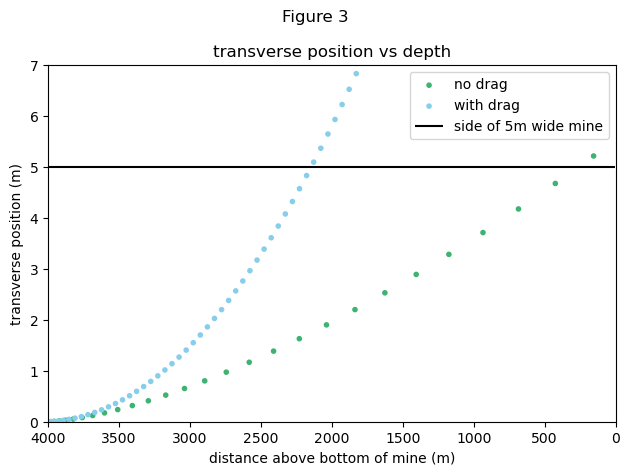

In [3]:
#Part 3

#Need to have differential equation now include: change in downward velocity component, change in sideways velocity component.

#defining new constants
omega = np.array([0,0,7.272*10**-5])
omega_value = 7.272*10**-5

#defining our function for the differential equation including the Coriolis force
def Derivatives_g_dependent_Coriolis(t, s):
    y = s[0]
    x = s[1]
    Vy = s[2]
    Vx = s[3]
    #V = np.array([Vx, Vy, 0])
    V_mag = np.sqrt(Vy**2 + Vx**2)
    g_dependent = g0 * (R_e+(y-4000)) / R_e
    dydt = Vy
    dxdt = Vx

    ### theta =  arctan(Vx/Vy)
    ### drag_y = drag * cos(theta) = drag * Vy/V_mag
    ### drag_x = drag * sin(theta) = drag * Vx/V_mag

    dVydt = -g_dependent + alpha*(abs(Vy)**gamma) - 2*omega_value*Vx
    dVxdt =  2*omega_value*(-Vy) - alpha*(abs(Vx)**gamma)
    return [dydt, dxdt, dVydt, dVxdt]



#defining the bottom of mine function
def side_of_mine(t,s):
    return s[1]-5

#setting drag back to 0
alpha = 0

#setting initial conditions
init_conditions = [4000, 0, 0, 0]

#setting our t_eval
t0, tf = 0, 100
t_eval = np.linspace(t0, tf, 401)

#solving
soln = solve_ivp(fun = Derivatives_g_dependent_Coriolis, y0 = init_conditions, t_span = (t0, tf), t_eval = t_eval, events = side_of_mine)
#capturing relevant values
t1 = soln.t
y1 = soln.y[0]
x1 = soln.y[1]
Vy1 = soln.y[2]
Vx1 = soln.y[3]
reached_side_t_coriolis1 = soln.y_events[0][0][0]
reached_side_t_coriolis1_time = soln.t_events[0][0]

#enabling drag
alpha = 0.00393
#solving
soln = solve_ivp(fun = Derivatives_g_dependent_Coriolis, y0 = init_conditions, t_span = (t0, tf), t_eval = t_eval, events = side_of_mine)
#capturing relevant values
t2 = soln.t
y2 = soln.y[0]
x2 = soln.y[1]
Vy2 = soln.y[2]
Vx2 = soln.y[3]

reached_side_t_coriolis2 = soln.y_events[0][0][0]
reached_side_t_coriolis2_time = soln.t_events[0][0]


#plotting
fig, ax = plt.subplots()
ax.scatter(y1[::4],x1[::4],marker='.',ls='',label='no drag',color='mediumseagreen')   ###Is this what you meant by plotting "dots"?
ax.scatter(y2[::4], x2[::4], marker = '.',ls='',label='with drag',color='skyblue')
ax.set_xlim(4000, 0)
ax.set_ylim(0,7)
ax.set_title('transverse position vs depth')
ax.set_ylabel('transverse position (m)')
ax.set_xlabel('distance above bottom of mine (m)')
ax.hlines(5,5,4000,color='black',label='side of 5m wide mine')

fig.suptitle('Figure 3')
ax.legend()
fig.tight_layout()

#printing for questions 3 and 4
print('''If the mineshaft is 5 meters wide, then, not considering drag, it will hit the wall before it bumps into the bottom. from the graph,
it is pretty clear that the object would hit the mine with a little under 500 meters to go before it reaches the bottom. the precise height above
the bottom of the mine at which it will hit the side is''',reached_side_t_coriolis1,'''meters above the bottom.

When drag is taken into account, the object would hit the side of the shaft''',reached_side_t_coriolis2,'''meters from the bottom. This does
result in a pretty significant difference in the remaining distance from the bottom. While it ultimately did not result in a different outcome
(i.e. the object hitting the bottom before the side), it did result in a large difference in the distance from the bottom, so there was a
significant difference between the two.

It would take''',reached_side_t_coriolis1_time,'''seconds for the object to hit the side of the mine assuming no drag, while it
would take''',reached_side_t_coriolis2_time,'''seconds for the test mass to hit the side of the mine assuming there is drag.\n''')



# Part 4

Assuming no drag, the object will reach the center of the earth after 1266.5753611491434 seconds, and will be travelling at -7910.0670649979775 meters
per second. The object will reach the other side after 2513.3993475549933 seconds

The orbital period for the earth is 4090047.182077768 seconds in very low earth orbit.

This crossing time is 3229.217390086393 times shorter than the orbital period.



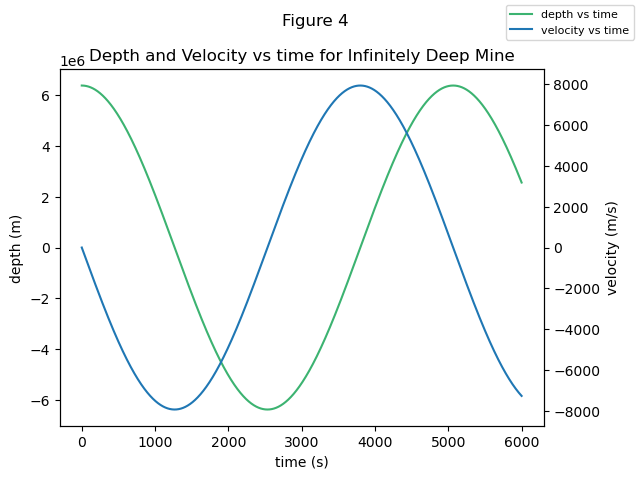

In [4]:
#Part 4

alpha = 0
g0 = 9.81
G = 6.6743*10**-11
M_e = 5.972*10**24

#re-defining the function here as we need to fix a couple things about the depth.
def Derivatives_g_dependent_infinite_depth(t, s):
    y = s[0]
    v = s[1]
    g_dependent = g0 * (y / R_e) #g flips sign when y goes below 0 (through the center of the Earth) so that acceleration also flips.
    dydt = v
    dvdt = -g_dependent + alpha*v**gamma
    return [dydt, dvdt]

#Defining the initial conditions; I am using y as distance from center, so y0 = R_e.
init_conditions = [R_e, 0]

#defining an events function to capture the tine it hits the center of Earth
def Center_of_Earth(t,s):
    return s[0]

def Other_Side(t,s):
    return R_e*.9997+s[0]

#setting our t_eval
t0, tf = 0, 6000
t_eval = np.linspace(t0, tf, 4001)

#solving
soln = solve_ivp(Derivatives_g_dependent_infinite_depth, y0 = init_conditions, t_span = (t0,tf), t_eval = t_eval, 
                 events = (Center_of_Earth, Other_Side), rtol=1e-9)

#capturing values
t = soln.t
y = soln.y[0]
v = soln.y[1]
#print('distance seen at other side vs radius of earth:',np.min(y),R_e)
t_at_center = soln.t_events[0][0]
#print(t_at_center)
v_at_center = soln.y_events[0][0][1]
#print(v_at_center)
t_otherside = soln.t_events[1][0]


fig, ax = plt.subplots()
ax.plot(t, y,label='depth vs time',c='mediumseagreen')
#ax.set_ylim(6.5*10**6,-0.5*10**6)
ax.set_ylabel('depth (m)')
ax.set_xlabel('time (s)')
ax2 = ax.twinx()
ax2.plot(t, v, label='velocity vs time')
ax2.set_ylabel('velocity (m/s)')


fig.legend(fontsize=8)
ax.set_title('Depth and Velocity vs time for Infinitely Deep Mine')
fig.suptitle('Figure 4')
fig.tight_layout()

#printing for part 2
print('Assuming no drag, the object will reach the center of the earth after',t_at_center,'seconds, and will be travelling at',v_at_center,'''meters
per second. The object will reach the other side after''',t_otherside,'''seconds''')

#part 3:

# w = v/r; v = wr, so wR = GM/R**2. w = 2*pi/Tao, so we get 2*pi*R/Tao = GM/R**2. Thus, we get 2*pi*R**3/G*M = Tao.

Tao = 2*np.pi*R_e**3/(M_e * G)
#print('tao is', Tao)
#print(Tao/t_at_center)
print('''\nThe orbital period for the earth is''',Tao,'''seconds in very low earth orbit.''')

print('\nThis crossing time is',Tao/t_at_center,'times shorter than the orbital period.\n')

# Part 5

it takes 1267.342799895386 seconds to reach the center for n = 0
the object is travelling at -7905.27712816981 meters per second when it reaches the center of the earth for n = 0.

it takes 1096.5129861824532 seconds to reach the center for n = 1
the object is travelling at -10457.69866354194 meters per second when it reaches the center of the earth for n = 1.

it takes 1035.0756470893648 seconds to reach the center for n = 2
the object is travelling at -12182.850257849763 meters per second when it reaches the center of the earth for n = 2.

it takes 943.7775312610353 seconds to reach the center for n = 9
the object is travelling at -18370.673767798366 meters per second when it reaches the center of the earth for n = 9.



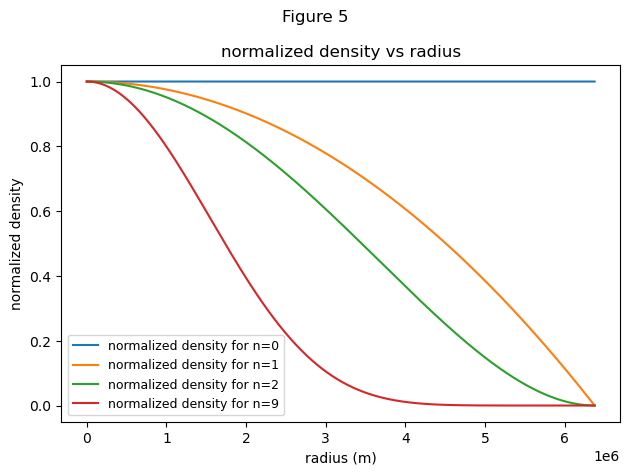

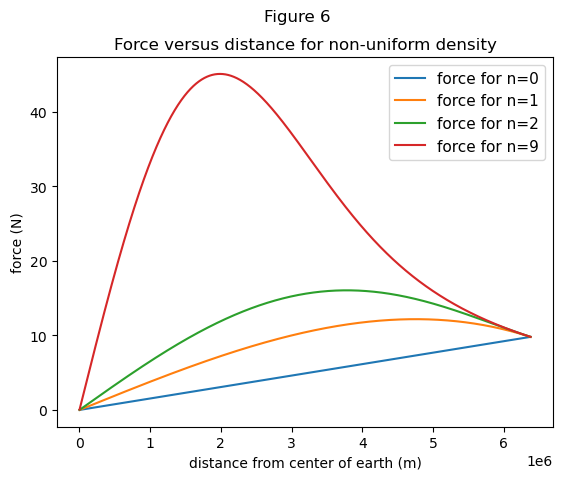

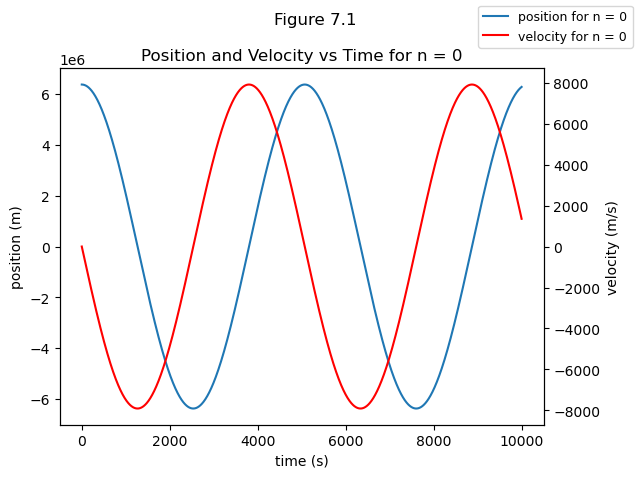

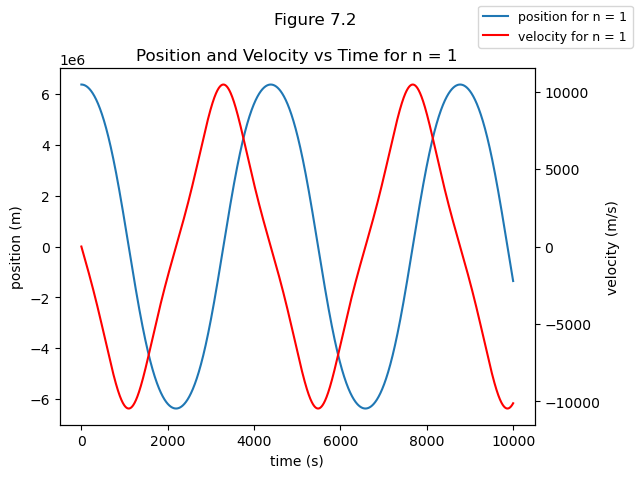

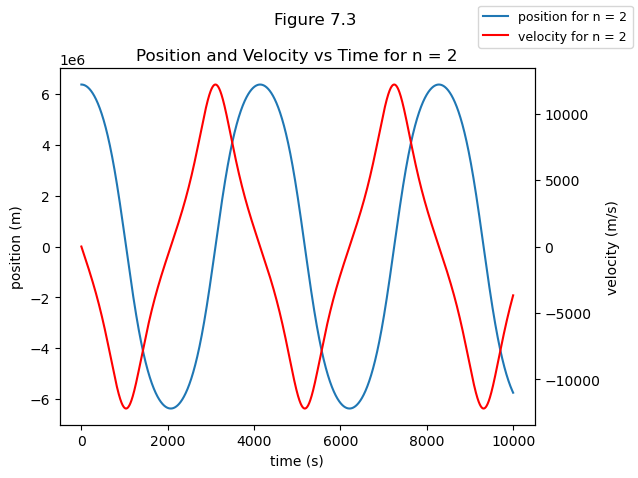

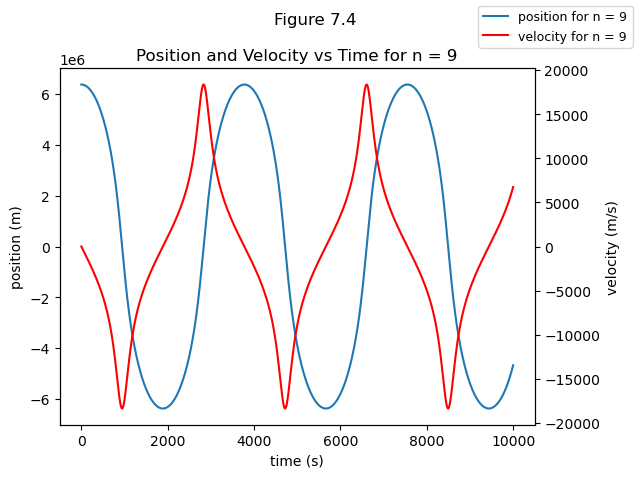

In [5]:
#Part 5: non-uniform earth
from scipy.integrate import quad


#defining p(r):
def p(r,p_norm):
    return p_norm*(1-(r/R_e)**2)**n



#setting r_eval
r0,rf = 0, R_e
r_eval = np.linspace(r0,rf,4001)

n = 0
N0 = p(r_eval,1)

n = 1
N1 = p(r_eval,1)

n = 2
N2 = p(r_eval,1)

n = 9
N9 = p(r_eval,1)

#plotting normalized density
fig, ax = plt.subplots()
ax.plot(r_eval, N0,label='normalized density for n=0')
ax.plot(r_eval, N1,label='normalized density for n=1')
ax.plot(r_eval, N2,label='normalized density for n=2')
ax.plot(r_eval, N9,label='normalized density for n=9')
ax.set_xlabel('radius (m)')
ax.set_ylabel('normalized density')

ax.legend(fontsize=9)
fig.suptitle('Figure 5')
ax.set_title('normalized density vs radius')
fig.tight_layout()

#finding a good normalizing constant

#defining our original function but multiplying by r^2
def p__times_r_squared(r,p_norm=1):
    return p_norm*(1-(r/R_e)**2)**n * r**2 * 4 * np.pi

#doing the integral for n=0, and calibrating p_norm
n = 0
p_norm = 1
sum0, err0 = quad(p__times_r_squared, 0, R_e,args=(p_norm))
#print(M_e/sum0)


p_norm_0 = M_e/sum0

#calibrating p_norm for n=1
n = 1
p_norm = 1
sum1, err1 = quad(p__times_r_squared, 0, R_e, args=(p_norm))
#print(M_e/sum1)

p_norm_1 = M_e/sum1

#calibrating p_norm for n=2
n = 2
p_norm = 1
sum2, err2 = quad(p__times_r_squared, 0, R_e,args=(p_norm))
#print(M_e/sum2)

p_norm_2 = M_e/sum2

#calibrating p_norm for n=9
n = 9
p_norm = 1
sum9, err9 = quad(p__times_r_squared, 0, R_e,args=(p_norm))
#print(M_e/sum9)

p_norm_9 = M_e/sum9

#calibration complete

#force as a function of radius
def F(r, p_norm_F):
    if np.isclose(r,0):
        F_tot = np.nan
    else:
        Mass_tot, error = quad(p__times_r_squared, 0, r, args=p_norm_F)
        F_tot = G*Mass_tot/r**2
    return F_tot

#force for n = 0
n = 0
F_0_array = np.zeros(len(r_eval))
for i in range(len(r_eval)):
    F_i = F(r_eval[i], p_norm_0)
    F_0_array[i] += F_i

#force for n = 1
n = 1
F_1_array = np.zeros(len(r_eval))
for i in range(len(r_eval)):
    F_i = F(r_eval[i], p_norm_1)
    F_1_array[i] += F_i

#force for n = 2
n = 2
F_2_array = np.zeros(len(r_eval))
for i in range(len(r_eval)):
    F_i = F(r_eval[i], p_norm_2)
    F_2_array[i] += F_i

#force for n = 9
n = 9
F_9_array = np.zeros(len(r_eval))
for i in range(len(r_eval)):
    F_i = F(r_eval[i], p_norm_9)
    F_9_array[i] += F_i

fig2, ax2 = plt.subplots()
ax2.plot(r_eval, F_0_array,label='force for n=0')
ax2.plot(r_eval, F_1_array,label='force for n=1')
ax2.plot(r_eval, F_2_array,label='force for n=2')
ax2.plot(r_eval, F_9_array,label='force for n=9')
ax2.set_xlabel('distance from center of earth (m)')
ax2.set_ylabel('force (N)')

ax2.set_title('Force versus distance for non-uniform density')
fig2.suptitle('Figure 6')
ax2.legend(fontsize=11)
fig.tight_layout()

#defining the new derivatives function for non-uniform density
def Derivatives_non_uniform_density(t, s):
    y = s[0]
    v = s[1]
    g_dependent = F(y,p_norm_conditional)
    dydt = v
    dvdt = -g_dependent #+ alpha*v**gamma
    return [dydt, dvdt]

#events function
def Center_of_Earth(t,s):
    return s[0]

#initial conditions
init_conditions = [R_e,0]

#t-span and t-eval
t0, tf = 0, 10000
t_eval = np.linspace(t0,tf,4001)

#setting the normalization constant and solving
alpha = 0
p_norm_conditional = p_norm_0
#print('p_norm',p_norm_conditional)

n = 0
soln_naught = solve_ivp(Derivatives_non_uniform_density, y0 = init_conditions, t_span = (t0,tf), t_eval = t_eval, events=Center_of_Earth, rtol=1e-9)
t_naught = soln_naught.t
y_naught = soln_naught.y[0]
v_naught = soln_naught.y[1]
t_event_naught = soln_naught.t_events[0][0]
y_event_naught = soln_naught.y_events[0][0][1]
print('it takes',t_event_naught,'seconds to reach the center for n = 0')
print('the object is travelling at',y_event_naught,'meters per second when it reaches the center of the earth for n = 0.\n')
#print(np.min(y_naught))
#print(soln_naught)

n = 1
p_norm_conditional = p_norm_1
#print('p_norm',p_norm_conditional)

soln1 = solve_ivp(Derivatives_non_uniform_density, y0 = init_conditions, t_span = (t0,tf), t_eval = t_eval, events=Center_of_Earth, rtol=1e-9)
t1 = soln1.t
y1 = soln1.y[0]
v1 = soln1.y[1]

t_event_1 = soln1.t_events[0][0]
y_event_1 = soln1.y_events[0][0][1]
print('it takes',t_event_1,'seconds to reach the center for n = 1')
print('the object is travelling at',y_event_1,'meters per second when it reaches the center of the earth for n = 1.\n')

n = 2
p_norm_conditional = p_norm_2
#print('p_norm',p_norm_conditional)

soln2 = solve_ivp(Derivatives_non_uniform_density, y0 = init_conditions, t_span = (t0,tf), t_eval = t_eval, events=Center_of_Earth, rtol=1e-9)
t2 = soln2.t
y2 = soln2.y[0]
v2 = soln2.y[1]

t_event_2 = soln2.t_events[0][0]
y_event_2 = soln2.y_events[0][0][1]
print('it takes',t_event_2,'seconds to reach the center for n = 2')
print('the object is travelling at',y_event_2,'meters per second when it reaches the center of the earth for n = 2.\n')

n = 9
p_norm_conditional = p_norm_9
#print('p_norm',p_norm_conditional)

soln9 = solve_ivp(Derivatives_non_uniform_density, y0 = init_conditions, t_span = (t0,tf), t_eval = t_eval, events=Center_of_Earth, rtol=1e-9)
t9 = soln9.t
y9 = soln9.y[0]
v9 = soln9.y[1]

t_event_9 = soln9.t_events[0][0]
y_event_9 = soln9.y_events[0][0][1]
print('it takes',t_event_9,'seconds to reach the center for n = 9')
print('the object is travelling at',y_event_9,'meters per second when it reaches the center of the earth for n = 9.\n')


#plotting the functions
fig3, ax3 = plt.subplots()
fig4, ax4 = plt.subplots()
fig5, ax5 = plt.subplots()
fig6, ax6 = plt.subplots()
ax3.plot(t_naught, y_naught,label='position for n = 0')
ax4.plot(t1,y1,label='position for n = 1')
ax5.plot(t2,y2,label='position for n = 2')
ax6.plot(t9,y9,label='position for n = 9')

ax3_1 = ax3.twinx()
ax4_1 = ax4.twinx()
ax5_1 = ax5.twinx()
ax6_1 = ax6.twinx()
ax3_1.plot(t_naught, v_naught,label='velocity for n = 0',color='red')
ax4_1.plot(t1,v1,label='velocity for n = 1',color='red')
ax5_1.plot(t2,v2,label='velocity for n = 2',color='red')
ax6_1.plot(t9,v9,label='velocity for n = 9',color='red')

fig3.legend(fontsize=9)
ax3.set_xlabel('time (s)')
ax3.set_ylabel('position (m)')
ax3_1.set_ylabel('velocity (m/s)')
fig3.suptitle('Figure 7.1')
ax3.set_title('Position and Velocity vs Time for n = 0')
fig3.tight_layout()

fig4.legend(fontsize=9)
ax4.set_xlabel('time (s)')
ax4.set_ylabel('position (m)')
ax4_1.set_ylabel('velocity (m/s)')
fig4.suptitle('Figure 7.2')
ax4.set_title('Position and Velocity vs Time for n = 1')
fig4.tight_layout()

fig5.legend(fontsize=9)
ax5.set_xlabel('time (s)')
ax5.set_ylabel('position (m)')
ax5_1.set_ylabel('velocity (m/s)')
fig5.suptitle('Figure 7.3')
ax5.set_title('Position and Velocity vs Time for n = 2')
fig5.tight_layout()

fig6.legend(fontsize=9)
ax6.set_xlabel('time (s)')
ax6.set_ylabel('position (m)')
ax6_1.set_ylabel('velocity (m/s)')
fig6.suptitle('Figure 7.4')
ax6.set_title('Position and Velocity vs Time for n = 9')
fig6.tight_layout()





p_norm_0_Earth = p_norm_0 #grabbing this value before i lose it later

# Part 6

In [6]:
#Part 6

#defining needed constants

R_moon = 1.7381*10**6
M_moon = 7.35*10**22

#Bringing over the functions from the last part but changing the neccesary constants
def p__times_r_squared(r,p_norm=1):
    return p_norm*(1-(r/R_moon)**2)**n * r**2 * 4 * np.pi

def Derivatives_non_uniform_density_moon(t, s):
    y = s[0]
    v = s[1]
    g_dependent = F(y,p_norm_conditional)
    dydt = v
    dvdt = -g_dependent + alpha*v**gamma
    return [dydt, dvdt]

n = 0
p_norm = 1

sum1, err1 = quad(p__times_r_squared, 0, R_moon,args=(p_norm))
#print(sum1/M_moon)

p_norm_0 = M_moon/sum1
ratio_moon_earth = p_norm_0/p_norm_0_Earth

#calibrating p_norm for n=1
n = 1
p_norm = 1
sum1, err1 = quad(p__times_r_squared, 0, R_moon, args=(p_norm))
#print(sum1/M_moon)

p_norm_1 = M_moon/sum1

#calibrating p_norm for n=2
n = 2
p_norm = 1
sum1, err1 = quad(p__times_r_squared, 0, R_moon,args=(p_norm))
#print(sum1/M_moon)

p_norm_2 = M_moon/sum1

#calibrating p_norm for n=9
n = 9
p_norm = 1
sum1, err1 = quad(p__times_r_squared, 0, R_moon,args=(p_norm))
#print(sum1/M_moon)

p_norm_9 = M_moon/sum1

#defining an events function
def center_of_moon(t,s):
    return s[0]

#t-span and t-eval
t0,tf = 0, 9000
t_eval = np.linspace(t0,tf,401)

#init_conditions
y0=[R_moon,0]
p_norm_conditional = p_norm_0
n = 0

soln = solve_ivp(fun=Derivatives_non_uniform_density_moon,t_span=(t0,tf),t_eval=t_eval,y0=y0,events=center_of_moon, rtol=1e-9)

time_to_center = soln.t_events[0][0]
y_event_0 = soln.y_events[0][0][1]
print('It would take',time_to_center,'seconds for a dropped object to reach the center of the moon, assuming no drag or coreolis force\n')

print('The density of the Moon is',ratio_moon_earth,'''times the density of the earth. We know this because this is the ratio between
the normalizing constants used for the earth versus for the moon.\n''')

print('the object is travelling at',y_event_0,'meters per second when it reaches the center of the moon for n = 9.\n')

p_norm_conditional = p_norm_1
n = 1

soln = solve_ivp(fun=Derivatives_non_uniform_density_moon,t_span=(t0,tf),t_eval=t_eval,y0=y0,events=center_of_moon, rtol=1e-9)

time_to_center_1 = soln.t_events[0][0]
y_event_1 = soln.y_events[0][0][1]
print('the object is travelling at',y_event_1,'meters per second when it reaches the center of the moon for n = 1.\n')



p_norm_conditional = p_norm_2
n = 2

soln = solve_ivp(fun=Derivatives_non_uniform_density_moon,t_span=(t0,tf),t_eval=t_eval,y0=y0,events=center_of_moon, rtol=1e-9)

time_to_center_2 = soln.t_events[0][0]
y_event_2 = soln.y_events[0][0][1]
print('the object is travelling at',y_event_2,'meters per second when it reaches the center of the moon for n = 2.\n')


p_norm_conditional = p_norm_9
n = 9

soln = solve_ivp(fun=Derivatives_non_uniform_density_moon,t_span=(t0,tf),t_eval=t_eval,y0=y0,events=center_of_moon, rtol=1e-9)

time_to_center_9 = soln.t_events[0][0]
y_event_9 = soln.y_events[0][0][1]
print('the object is travelling at',y_event_9,'meters per second when it reaches the center of the moon for n = 9.\n')

print('''The time it takes to fall to the center of the moon does vary with different density distributions.
as stated before, it takes''',time_to_center,'''seconds to reach the center of the moon with constant density. However, with
variable density using the procedure in part 5, for n = 1, it takes''',time_to_center_1,'''seconds, for n = 2, it 
takes''',
time_to_center_2,'''seconds, and for n = 9, it takes''',time_to_center_9,'seconds to reach the center of the moon.')

It would take 1625.1201867019768 seconds for a dropped object to reach the center of the moon, assuming no drag or coreolis force

The density of the Moon is 0.6081591337511926 times the density of the earth. We know this because this is the ratio between
the normalizing constants used for the earth versus for the moon.

the object is travelling at -1679.9994960493414 meters per second when it reaches the center of the moon for n = 9.

the object is travelling at -2222.4304349010044 meters per second when it reaches the center of the moon for n = 1.

the object is travelling at -2589.053105105637 meters per second when it reaches the center of the moon for n = 2.

the object is travelling at -3904.0658757453216 meters per second when it reaches the center of the moon for n = 9.

The time it takes to fall to the center of the moon does vary with different density distributions.
as stated before, it takes 1625.1201867019768 seconds to reach the center of the moon with constant density. H